In [26]:
from sklearn.datasets import load_iris
#load_iris is basically a dataset directory , that contains some features along with targets and other stuff.
import pandas as pd

import numpy as np
iris = load_iris()
iris.feature_names
print (dir(iris))
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
#df['target_names'] = iris.target_names# this is wrong as target_names only contained 3 names which is wrongly fitting for 150 rows.
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])
df.head(150)
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]
print(df.head())



['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  


Text(0, 0.5, 'petal width (cm)')

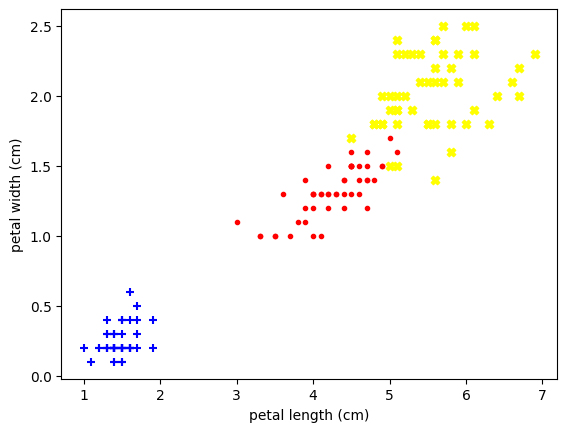

In [34]:
# try to visualize the data in order to select some model.
# scatter plot for petal data.
from matplotlib import pyplot as plt
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'blue', marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'red', marker='.')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'yellow', marker='X')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

Text(0, 0.5, 'sepal width (cm)')

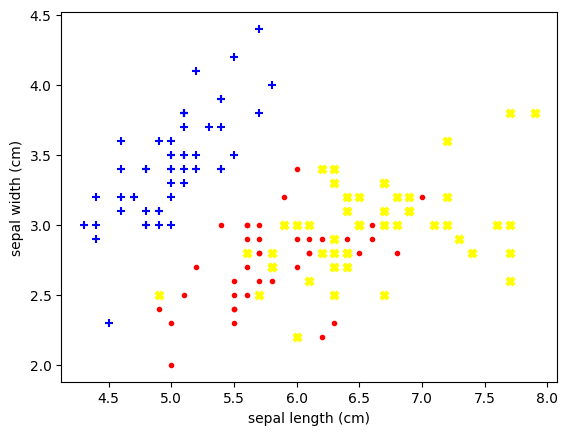

In [33]:
# try to visualize the data in order to select some model.
# scatter plot for sepal data.
from matplotlib import pyplot as plt
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'blue', marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'red', marker='.')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color = 'yellow', marker='X')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [63]:
# now lets create x and y sets to train out model and then split it.
x = df.drop(['target','flower_names'],axis='columns')
y = df.target
from sklearn.model_selection import train_test_split
x_train, x_test,y_train , y_test= train_test_split(x,y,test_size=0.2,random_state=42)
print(x_test.head())
print(y_test.head())


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73                 6.1               2.8                4.7               1.2
18                 5.7               3.8                1.7               0.3
118                7.7               2.6                6.9               2.3
78                 6.0               2.9                4.5               1.5
76                 6.8               2.8                4.8               1.4
73     1
18     0
118    2
78     1
76     1
Name: target, dtype: int32


In [67]:
# model selection and training.
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
print((model.score(x_test,y_test)) * 100)
print(model.predict([[6.1,2.8,4.7,1.2]]))# gives accurate prediction.
print(model.predict([[7.7,2.6,6.9,2.9]]))
# hense following is a simple SVC model that gives 100 percent accuracy for out given test data.

100.0
[1]
[2]


c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
